# Lab03 - Logistic Regression with basic PyTorch

#### Objectives:
1. Learn how to implement logistic regression using the basic PyTorch commands 
2. Understand the main difference between numpy and pytorch

#### Task:
In this lab, you will appy what you learnt in Lab2A and Lab2B to implement the logistic regression using the most basic PyTorch commands.

    
#### Content:
1. [Basic Functions for training LogReg](#1.-Basic-Functions-for-training-LogReg)
   1. [Forward propagation](#1.1-Forward-propagation)
   2. [Backpropagation](#1.2-Backpropagation)
   3. [The cost function](#1.3-The-cost-function)
2. [Loading the dataset](#2.-Loading-the-dataset)
3. [Training the model](#3.-Training-the-model)
4. [Evaluating the model](#4.-Evaluating-the-model)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd "/content/drive/MyDrive/UCCD3074_Labs/UCCD3074_Lab3/"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from PIL import Image
from utils import load_dataset
import torch

---
## 1. Basic Functions for training LogReg

In the following, we shall implement the score function to perform forward propagation.

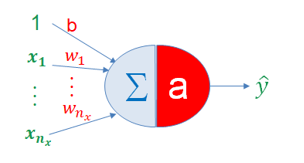

### 1.1 Forward propagation

<font color="blue">

#### Exercise 1

1. Implement the forward propagation algorithm to make predictions. Use PyTorch to implement the function.

$$Z = w^TX + b\tag{1}$$
$$Yhat = sigmoid(Z)\tag{2}$$
    
2. Verify your code based on this example:
    
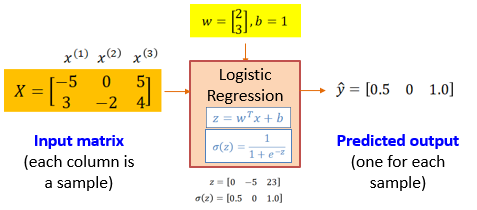
    
Expected output:
```
tensor([[0.5000, 0.0067, 1.0000]])
```

Create the tensors for `X`, `w`, `b`. Hint: use `torch.tensor`

In [ ]:
### START CODE HERE ### (≈ 3 line of code)   
...
### END CODE HERE ###

assert X.dtype == torch.float32
assert w.dtype == torch.float32
assert b.dtype == torch.float32
assert X.shape == torch.Size([2, 3])
assert w.shape == torch.Size([2,1])
assert b == 1.

Implement the forward propagation function

In [ ]:
def forward(X, w, b):
    ### START CODE HERE ### (≈ 2-3 line of code)    
    ...
    ### END CODE HERE 
    
    return A

In [ ]:
out = forward(X, w, b)

---
### 1.2 Backpropagation

For backpropagation, we do not to implement anything since this can be computed automatically by PyTorch through AutoGrad. 

---

### 1.3 The cost function

Now implement the cost function

$$J(w,b)=\frac{1}{m}\sum_{i=1}^{m}(-y^{(i)}\log(\hat{y}^{(i)}) - (1 - y^{(i)})\log(1-\hat{y}^{(i)}))$$

<font color="blue">
    
#### Exercise 2: 

1. Implement the cost function using PyTorch library.
2. Then, verify your code using the example here:
    
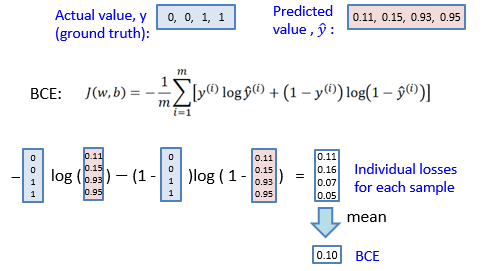

</font>

Implement the binary cross entropy

In [ ]:
def bce(Yhat, Y):

    Yhat = torch.clamp(Yhat, min=1e-5, max=0.99999)
    
    ### START CODE HERE ### (≈ 1-2 line of code)
    ...
    ### END CODE HERE ###

    return loss

Create the test case Yhat and Y

In [ ]:
Y = torch.tensor(((0,0,1,1),))
Yhat = torch.tensor(((0.11, 0.15, 0.93, 0.95),))

assert Y.shape == torch.Size((1,4))
assert Yhat.shape == torch.Size((1,4))

Verify your result using the test case. Expected ans = 0.10

In [ ]:
print('loss = {:.2f}'.format(bce(Yhat, Y)))

---
## 2. Loading the dataset

We will use the cat dataset that we used in our practical dataset as last week. There are 209 training samples and 50 test samples. Each sample is an image of resolution `(64, 64, 3)`. The labels can be positive (`y=1`) and negative (`y=0`)

In [ ]:
X_train_np, Y_train_np, X_test_np, Y_test_np, classes = load_dataset()

m_train = len(X_train_np)  # number of training samples
m_test = len(X_test_np)    # number of test samples

Flatten each sample to get the matrix of size `(nx, m)`.

In [ ]:
X_train_np = X_train_np.reshape(m_train, -1).T
X_test_np =  X_test_np.reshape(m_test, -1).T

Preprocess the data so that the pixel values lie in the range [0, 1]

In [ ]:
X_train_np = X_train_np/255.
X_test_np  = X_test_np/255.

#### Exercise 3

Convert `X_train_np`, `X_test_np`, `Y_train_np` and `Y_test_np` to PyTorch's tensor and save them as `X_train`, `X_test`, `Y_train` and `Y_test`. Load to the GPU. Make sure that `X_train` and `X_test` are of type `torch.float32` whereas `Y_train` and `Y_test` are of type `torch.int64`. For PyTorch, `torch.float32` and `torch.int64` are the default type for real number and integers. 

In [ ]:
### Initialize X_train, Y_train, X_test and Y_test (4 lines) ###
X_train = ...
Y_train = ...

X_test = ...
Y_test = ...
### END CODE HERE ###

### transfer to GPU if available (5 lines) ###
...
### END CODE HERE ###

assert X_train.dtype == torch.float32
assert X_test.dtype == torch.float32
assert Y_train.dtype == torch.int64
assert Y_test.dtype == torch.int64

---
## 3. Training the model

Now, its time to train the model. Implement the **gradient descent** algorithm as follows:

1. Initialize w and  b
2. Repeat until convergence
    1. Perform forward propagation to get `Yhat`
    2. Compute the `cost` 
    3. Perform backpropagation to get `dw` and `db`
    4. Update `w = w - lr*dw`
    5. Update `b = b - lr*db`

#### Exercise 4

Complete the gradient descent algorithm below to train the logistic regression.
    
**Implementation Notes**: 
    
1. Different from past practical where you use numpy, when you use PyTorch, you are buildling a computational graph in the  process. So, you cannot use the following command to update `w` in PyTorch
    ```
    w = w - lr*dw        # this will not work!
    ```    

    This is because this will create a new `w` node. as follows: 

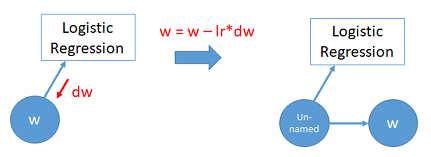

2. To ensure that you are updating the correct node, use in-place operations, e.g. 

    ```
    w.sub_(lr*dw)        # In-place operation, OK
    ```
    or
    ```
    w -= lr*dw        # In-place operation, OK
    ```

3. We must reset the gradients to zero in each iteration to avoid them from accumulating over iterations.
   ```
    w.grad.zero_()
    b.grad.zero_()
   ```
    
4. We need to perform operations required for gradient computation only during forward and backpropagation. We do not need to do so when updating the network parameters, `w` and `b`. Hence, when we are updating the network parameteres, we set 
    ```    
    with torch.no_grad():
    ```
    to disable gradient calculation. 

    Disabling gradient calculation is also useful for inference (testing), when you are sure that you will not call `Tensor.backward()`. It will reduce memory consumption for computations that would otherwise have `requires_grad=True`.

    In this mode, the result of every computation will have `requires_grad=False`, even when the inputs have `requires_grad=True`.
    
Expected ans:
```
Cost after iteration 100: 0.900279
Cost after iteration 200: 0.806134
Cost after iteration 300: 0.601848
Cost after iteration 400: 0.441729
Cost after iteration 500: 0.316641
Cost after iteration 600: 0.232562
Cost after iteration 700: 0.204981
Cost after iteration 800: 0.190242
Cost after iteration 900: 0.177568
Cost after iteration 1000: 0.166467
```

In [ ]:
def train(X, Y, num_iter, lr, verbose = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w: weights, a numpy array of size (nx, 1)
    b: bias, a scalar
    X: input matrix. Shape = (nx, m)
    Y: expected output. Shape =  (1, m)
    lr: learning rate 
    
    Returns:
    w, b 
    """
    history =  {}
    
    nx, m = X.shape 
    
    if torch.cuda.is_available():
        device = torch.device('cuda')
    else:
        device = torch.device('cpu')
    
    ### START CODE HERE ###  

    # Initialize w with a small random values and b with zeros
    w = ...  # initialize w with random normal
    ...      # multiply w with 0.01 
    b = ...
    
    for i in range(num_iter):
        
        # forward propagation
        Yhat = ...
        
        # compute cost
        cost = ...
                
        # back propagation
        ...

        # do not compute gradient here
        with torch.no_grad():
            
            # update w and b 
            ...
                                    
            # reset the weights and bias to zero
            ...

        if (i+1) % 100 == 0 or i == num_iter-1:
            history[i+1] = cost  
            if verbose: print ("Cost after iteration %i: %f" %(i+1, cost))

    ### END CODE HERE ###

    return w, b, history

The following code performs the training

In [ ]:
lr = 0.01
num_iter = 2000

w, b, history = train(X_train, Y_train, num_iter, lr, verbose=True)

---
## 4. Evaluating the model

In this section, we evaluat the model that we have built.

<font color="blue">
    
#### Exercise 5

Implement the `predict` function. It should return a binary vector where:   
```
predicted = 1 if Yhat >= 0.5,  0 otherwise
```
    
Remember to **turn off gradient computation** when you perform inference, because we do not need the gradient here.
    
Expected ans (first 10 samples):
```
tensor([0, 0, 1, 0, 0, 0, 0, 1, 0, 0], dtype=torch.int32)
```

In [ ]:
def predict(X, w, b):
    ### START CODE HERE ###
    # disable gradient computation
    ...
        # perform forward propagation
        Yhat = ...
        
        # compute label
        predicted = ...
        
        # convert to integer
        predicted = ...
        
    ### END CODE HERE ###
    return predicted

In [ ]:
predicted = predict(X_train, w, b)
print(predicted[0, :10])

Finally, let's compute the training and test accuracy for our model. 

In [ ]:
from sklearn.metrics import accuracy_score

# Compute the train accuracy
pred_train = predict(X_train, w, b)
if torch.cuda.is_available():
    pred_train = pred_train.cpu()
    Y_train   = Y_train.cpu()

train_acc = accuracy_score( pred_train.view(-1), Y_train.view(-1))
print('Training accuracy = {:.4f}'.format(train_acc))

# Compute the testing accuracy
pred_test = predict(X_test, w, b)
if torch.cuda.is_available():
    pred_test = pred_test.cpu()
    Y_test    = Y_test.cpu()

test_acc = accuracy_score(pred_test.view(-1), Y_test.view(-1))
print('Test accuracy = {:.4f}'.format(test_acc))